In [1]:
import pandas

go_df = pandas.read_csv('go_values.csv',index_col=0)
c_df = pandas.read_csv('c_values.csv',index_col=0)

In [2]:
go_df.head()

,Executavel,Tam_Tabuleiro,Num_Iteracoes,Num_Threads,Tempo_Conc,Tempo_Pool
0,Go,32,256,1,0.019797,0.019797
1,Go,32,256,4,0.019000,0.013961
2,Go,32,256,8,0.018703,0.014498
3,Go,32,256,16,0.018794,0.015289
4,Go,32,512,1,0.039108,0.039108


In [3]:
c_df.head()

,Executavel,Tam_Tabuleiro,Num_Iteracoes,Num_Threads,Tempo
0,C,32,256,1,0.011135
1,C,32,256,4,0.033274
2,C,32,256,8,0.016589
3,C,32,256,16,0.020244
4,C,32,512,1,0.021516


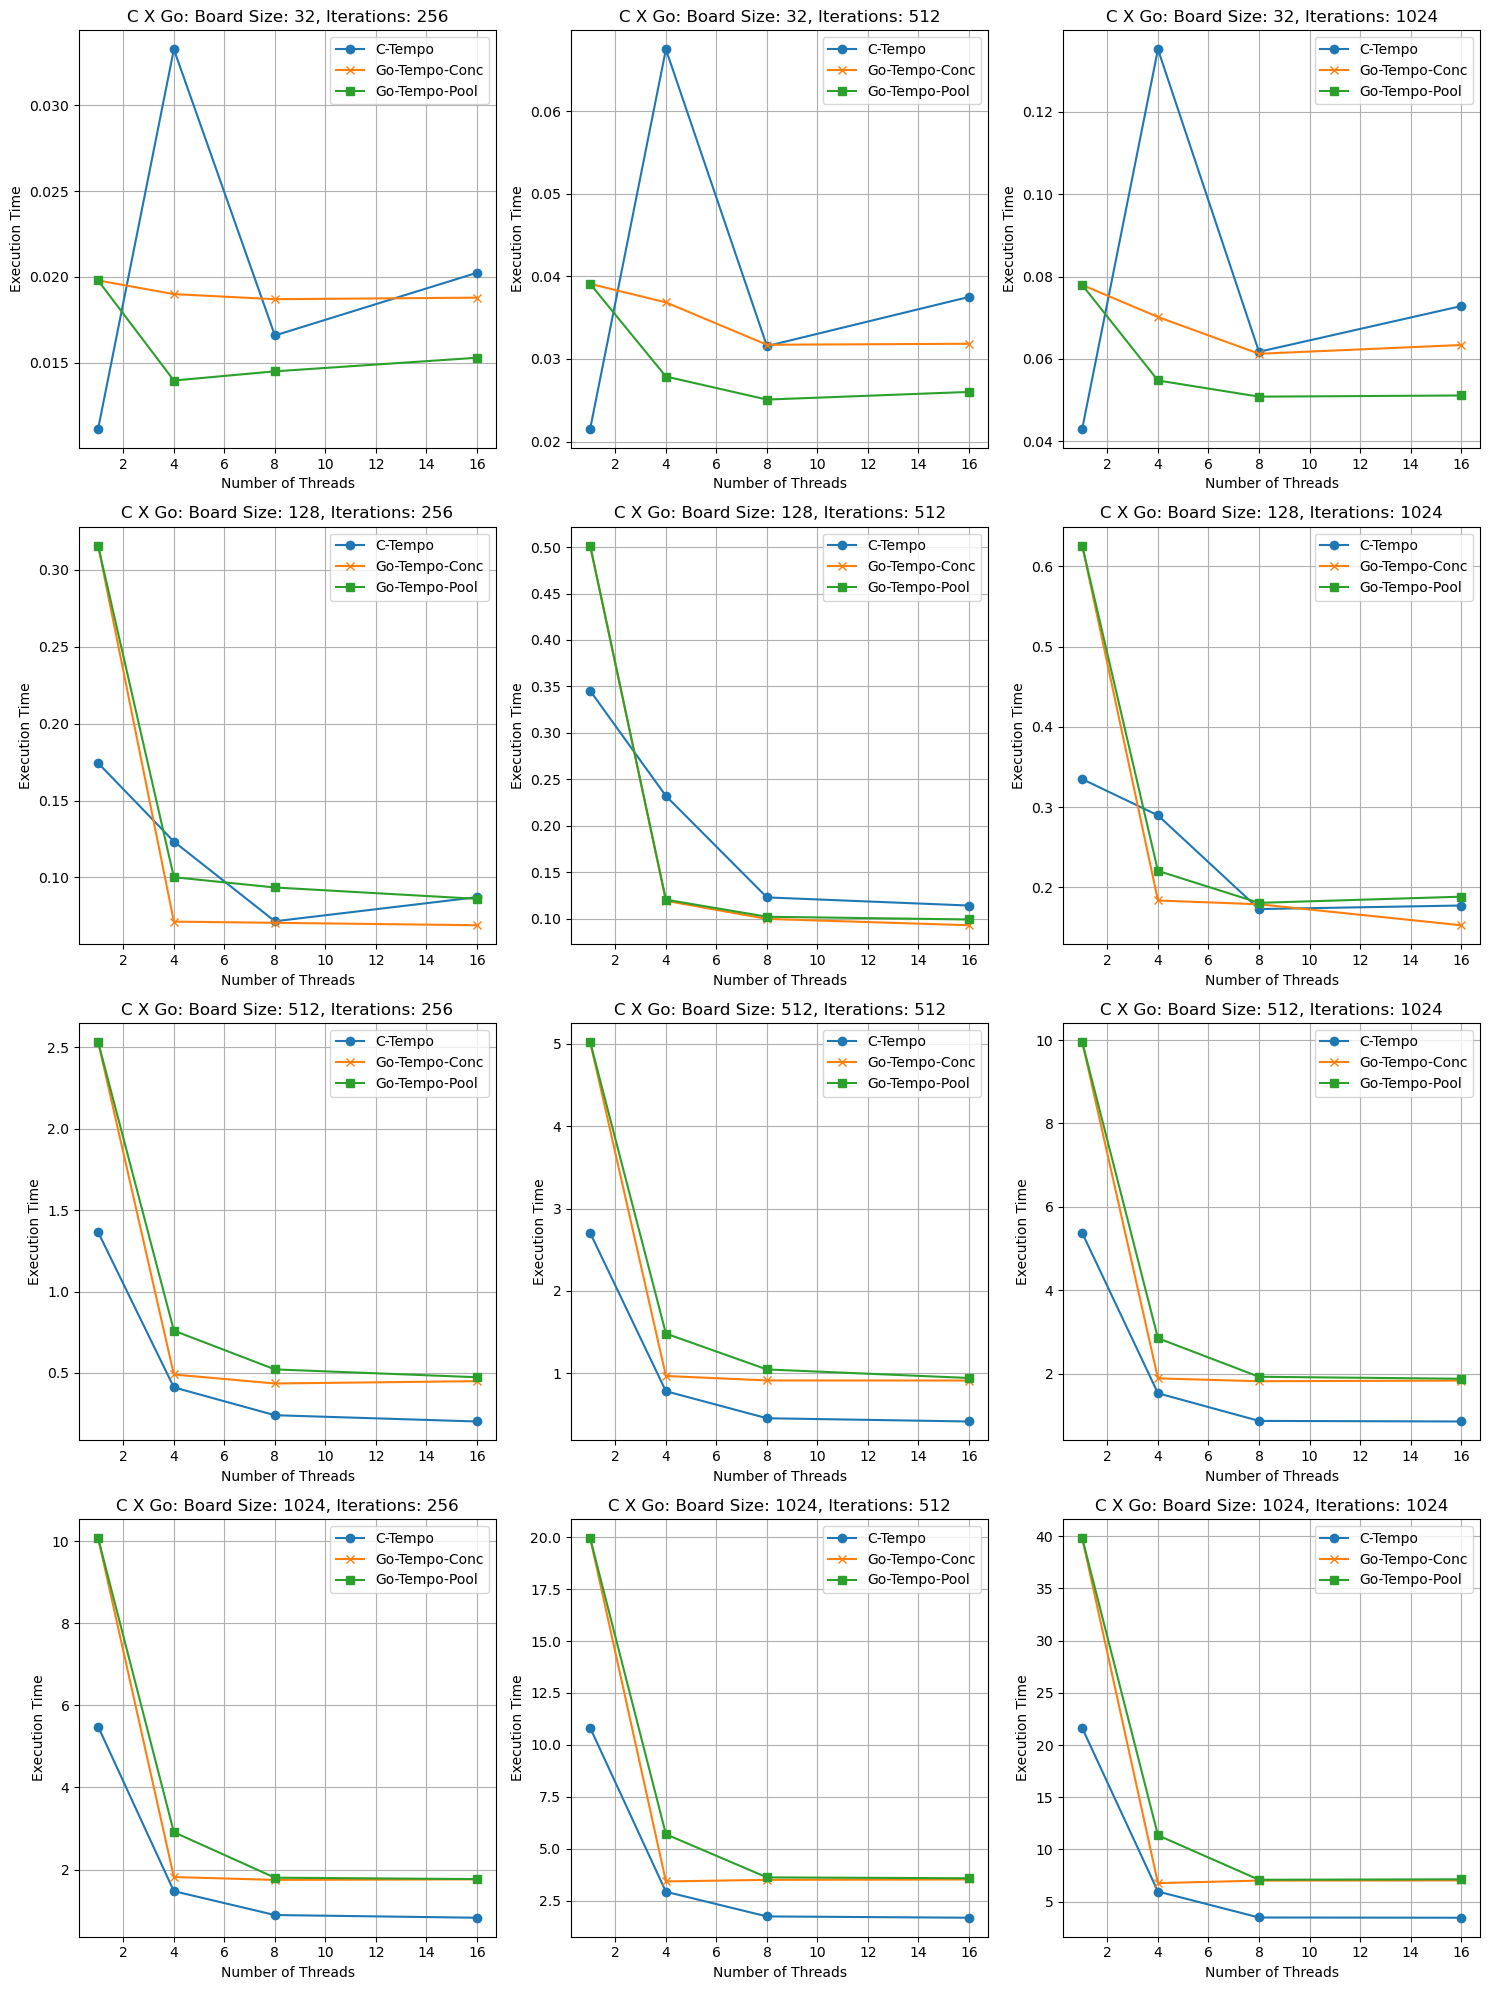

In [8]:
import matplotlib.pyplot as plt

go_grouped = go_df.groupby(['Tam_Tabuleiro','Num_Iteracoes'])
c_grouped = c_df.groupby(['Tam_Tabuleiro','Num_Iteracoes'])

num_plots = len(go_grouped)
ncols = 3
nrows = (num_plots + ncols - 1) // ncols

# Adjust figure size based on the number of plots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, nrows * 5))
axes = axes.flatten()  # Flatten axes array for easier iteration


# Generate subplots
for (ax, (((board_size,iterations),c_group),((_,_), go_group))) in zip(axes, zip(c_grouped,go_grouped)):
    ax.plot(c_group["Num_Threads"], c_group["Tempo"], label="C-Tempo", marker='o')
    ax.plot(go_group["Num_Threads"], go_group["Tempo_Conc"], label="Go-Tempo-Conc", marker='x')
    ax.plot(go_group["Num_Threads"], go_group["Tempo_Pool"], label="Go-Tempo-Pool", marker='s')
    ax.set_title(f"C X Go: Board Size: {board_size}, Iterations: {iterations}")
    ax.set_xlabel("Number of Threads")
    ax.set_ylabel("Execution Time")

    ax.legend()
    ax.grid(True)



# Hide unused subplots if the number of plots isn't a perfect grid
for ax in axes[num_plots:]:
    ax.axis("off")

plt.tight_layout()
plt.show()


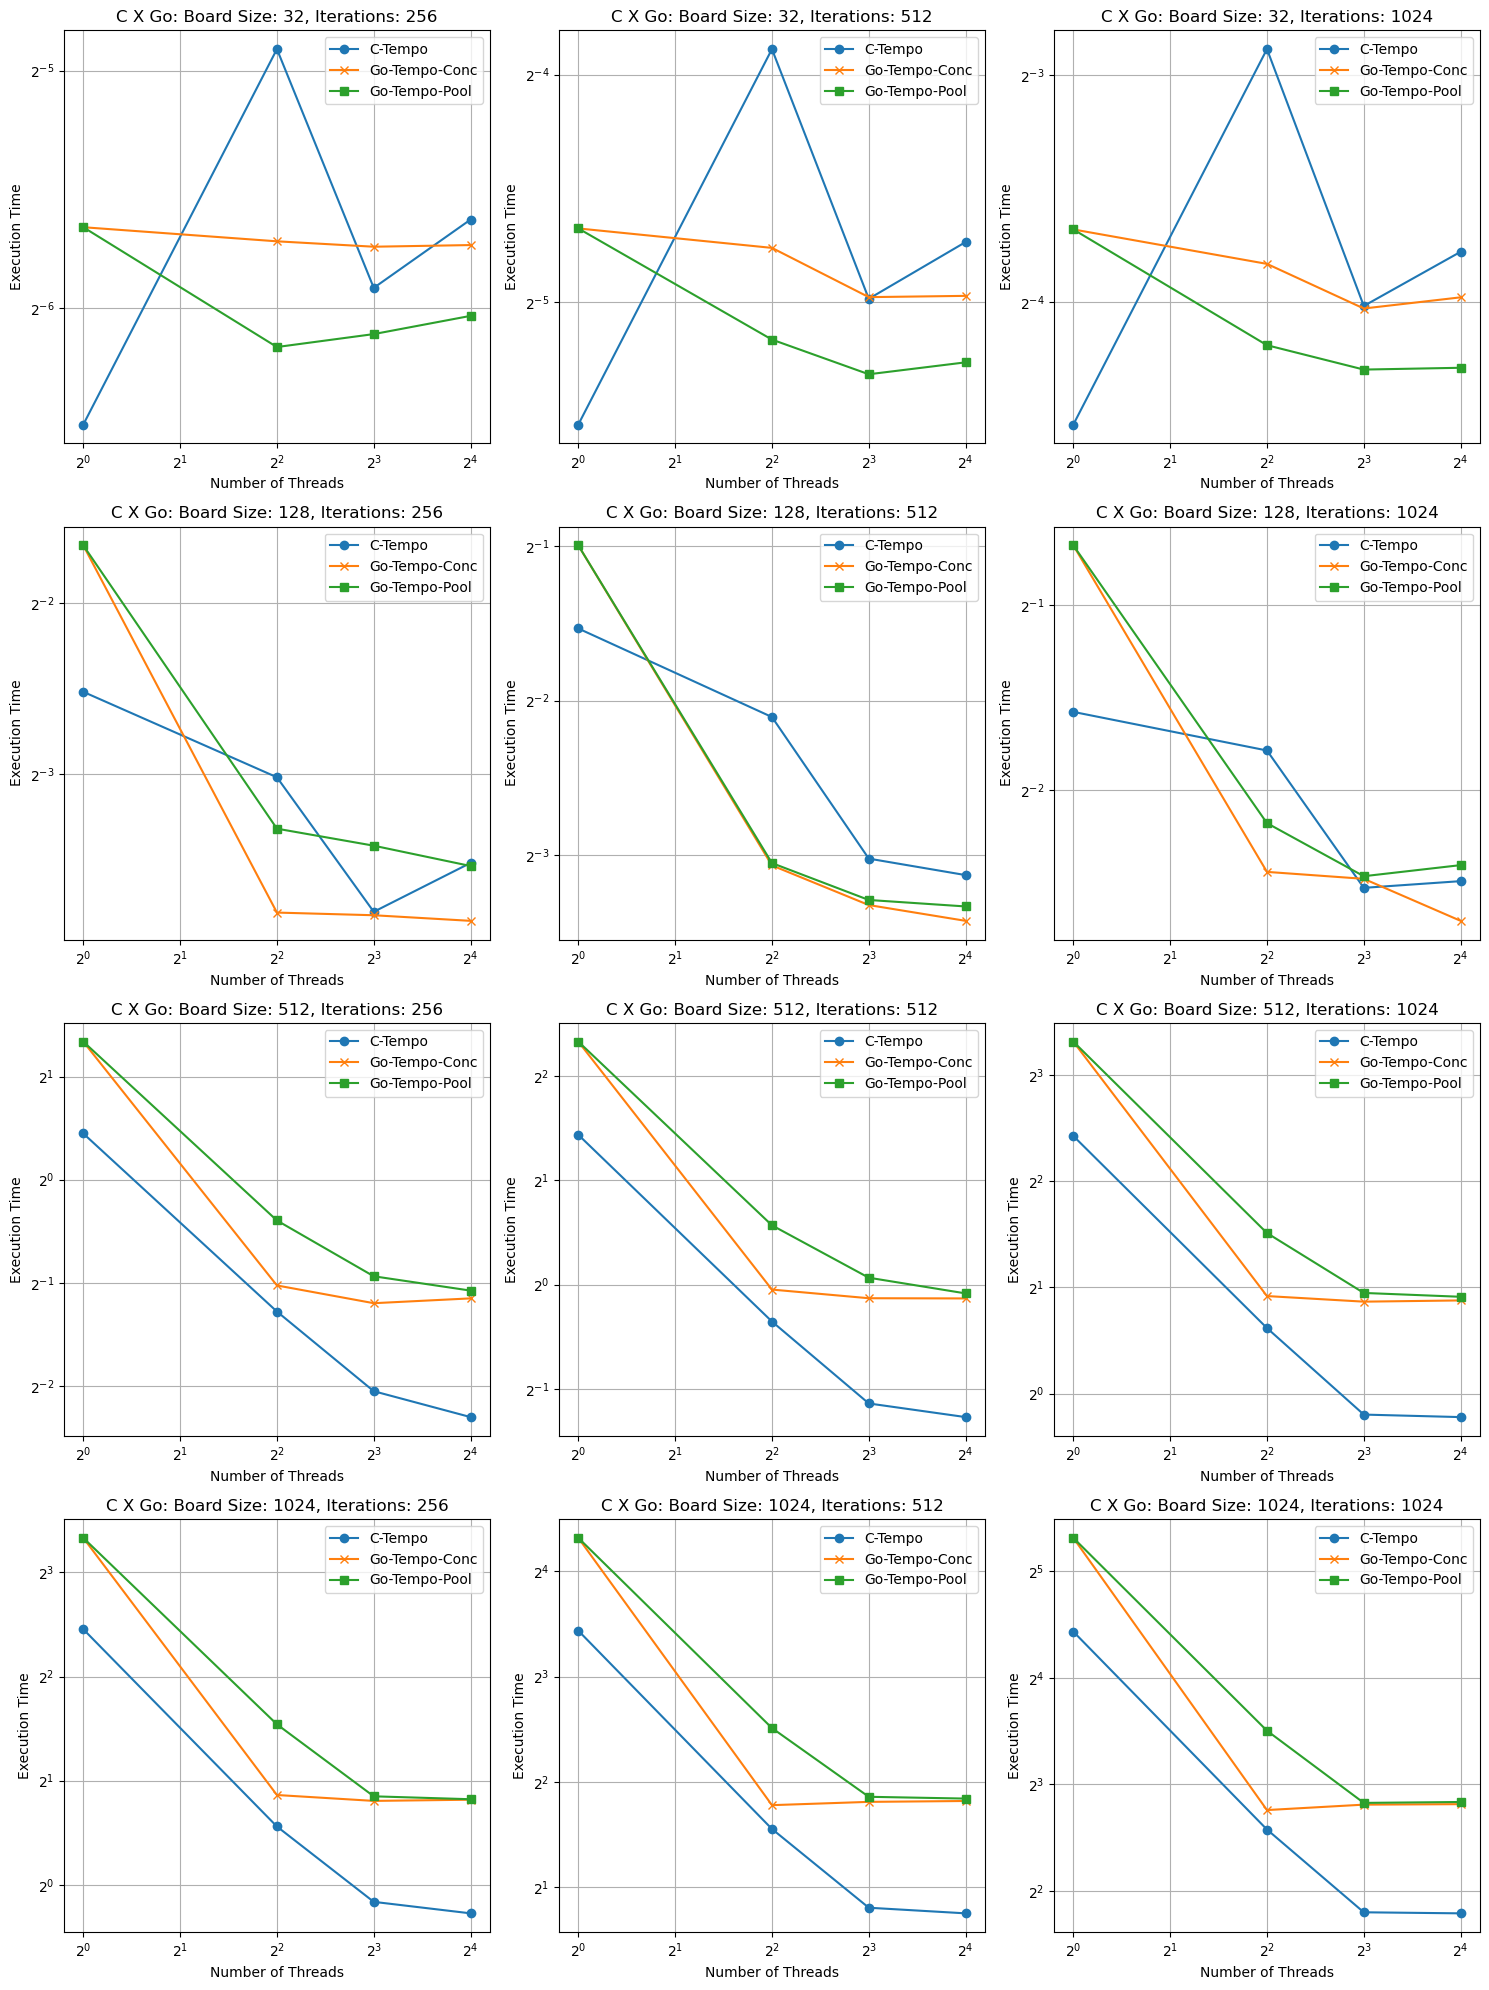

In [10]:
# a mesma coisa log scale
num_plots = len(go_grouped)
ncols = 3
nrows = (num_plots + ncols - 1) // ncols

# Adjust figure size based on the number of plots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, nrows * 5))
axes = axes.flatten()  # Flatten axes array for easier iteration


# Generate subplots
for (ax, (((board_size,iterations),c_group),((_,_), go_group))) in zip(axes, zip(c_grouped,go_grouped)):
    ax.set_xscale('log',base=2)
    ax.set_yscale('log',base=2)
    ax.plot(c_group["Num_Threads"], c_group["Tempo"], label="C-Tempo", marker='o')
    ax.plot(go_group["Num_Threads"], go_group["Tempo_Conc"], label="Go-Tempo-Conc", marker='x')
    ax.plot(go_group["Num_Threads"], go_group["Tempo_Pool"], label="Go-Tempo-Pool", marker='s')
    ax.set_title(f"C X Go: Board Size: {board_size}, Iterations: {iterations}")
    ax.set_xlabel("Number of Threads")
    ax.set_ylabel("Execution Time")

    ax.legend()
    ax.grid(True)



# Hide unused subplots if the number of plots isn't a perfect grid
for ax in axes[num_plots:]:
    ax.axis("off")

plt.tight_layout()
plt.show()